In [1]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import Dataset
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from utils_train import *
import deepdish as dd
from configs import DatasetConfiguration
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed=seed)

splitting = 'custom'
data_setting = 'raw'
model_setting = 'conv1d'

d = Dataset('Wingbeats')
d.read(loadmat=False)

X_train, X_val, X_test, y_train, y_val, y_test, le = mosquito_data_split(splitting=splitting, dataset=d, downsampling=False, return_label_encoder=True)

X_train, X_val, y_train, y_val = X_train[0], X_val[0], y_train[0], y_val[0]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=seed)
X_val, y_val = shuffle(X_val, y_val, random_state=seed)

get_labelencoder_mapping(le)

/home/yannis/anaconda3/envs/wings/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/yannis/anaconda3/envs/wings/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


Species: all.
Read 279566 filenames in 1.28 seconds.
Species: Ae. aegypti.
Read 85553 filenames in 2.69 seconds.
['20170208', '20170210', '20161212', '20161213', '20170206', '20170207', '20170209', '20170211', '20170212', '20170213']
82989 train filenames, 2564 test filenames
Species: Ae. albopictus.
Read 20231 filenames in 2.81 seconds.
['20170102', '20170103', '20170227', '20170228', '20170301']
17440 train filenames, 2791 test filenames
Species: An. arabiensis.
Read 19297 filenames in 3.15 seconds.
['20170130', '20170131', '20170201', '20170202', '20170203', '20170204', '20170205', '20170314', '20170315', '20170317', '20170206', '20170313', '20170316', '20170318', '20170319', '20170320']
12897 train filenames, 2831 test filenames
Species: An. gambiae.
Read 49471 filenames in 2.71 seconds.
['20170116', '20170117', '20170118', '20170119', '20170120', '20170121', '20170122', '20170123', '20170109', '20170110']
45471 train filenames, 4000 test filenames
Species: C. quinquefasciatus.
Rea

{'Ae. aegypti': 0,
 'Ae. albopictus': 1,
 'An. arabiensis': 2,
 'An. gambiae': 3,
 'C. pipiens': 4,
 'C. quinquefasciatus': 5}

## Choosing model (6 classes or 3-merged)

In [2]:
merged = False

if merged:
    # Merging the mosquito genuses together
    y_train = pd.Series(y_train).replace({1:0, 3:2, 5:4}).replace({2:1, 4:2}).tolist()
    y_val = pd.Series(y_val).replace({1:0, 3:2, 5:4}).replace({2:1, 4:2}).tolist()
    y_test = pd.Series(y_test).replace({1:0, 3:2, 5:4}).replace({2:1, 4:2}).tolist()

    # Defining model parameters
    modelname = f'TL_{splitting}_{data_setting}_{model_setting}_MERGED_weights'
else:
    modelname = f'TL_{splitting}_{data_setting}_{model_setting}_weights'
    
using_conv2d = False
traincf = TrainConfiguration(dataset=d, setting=data_setting, model_name=modelname)
model = ModelConfiguration(model_setting=model_setting, data_setting=data_setting, target_names=traincf.target_names).config

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train_stats = calculate_train_statistics(X_train=X_train, setting=data_setting)

############ INPUT SHAPE:(5000, 1)


### Model training

In [3]:
h = model.fit_generator(train_generator(X_train, y_train, 
                                    batch_size=traincf.batch_size,
                                    target_names=traincf.target_names,
                                    setting=traincf.setting,
                                    preprocessing_train_stats='',
                                    using_conv2d=using_conv2d),
                    steps_per_epoch = int(math.ceil(float(len(X_train)) / float(traincf.batch_size))),
                    epochs = traincf.epochs,
                    validation_data = valid_generator(X_val, y_val,
                                                        batch_size=traincf.batch_size,
                                                        target_names=traincf.target_names,
                                                        setting=traincf.setting,
                                                        preprocessing_train_stats='',
                                                        using_conv2d=using_conv2d),
                    validation_steps=int(math.ceil(float(len(X_test))/float(traincf.batch_size))),
                    callbacks=traincf.callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5718 steps, validate for 1478 steps
Epoch 1/100
5717/5718 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8570
Epoch 00001: val_loss improved from inf to 0.68851, saving model to /media/yannis/HGST_4TB/Ubudirs/projects/wingbeat_frequencies/temp_data/TL_custom_raw_conv1d_weights.h5
5718/5718 [==============================] - 315s 55ms/step - loss: 0.4100 - accuracy: 0.8570 - val_loss: 0.6885 - val_accuracy: 0.7563
Epoch 2/100
5716/5718 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9082
Epoch 00002: val_loss did not improve from 0.68851
5718/5718 [==============================] - 333s 58ms/step - loss: 0.2633 - accuracy: 0.9082 - val_loss: 6.9283 - val_accuracy: 0.3883
Epoch 3/100
5717/5718 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.9222
Epoch 00003: val_loss did not improve

In [8]:
# model.load_weights('../temp_data/custom_raw_conv1d_0.h5')

In [9]:
features = model.predict_generator(valid_generator(X_test, y_test, 
                                                  batch_size=traincf.batch_size, 
                                                  setting=traincf.setting, 
                                                  target_names=traincf.target_names,
                                                  preprocessing_train_stats=''),
                                  steps = int(math.ceil(float(len(X_test)) / float(traincf.batch_size))))

In [10]:
features.shape

(47295, 6)

### Confusion matrix (test set)

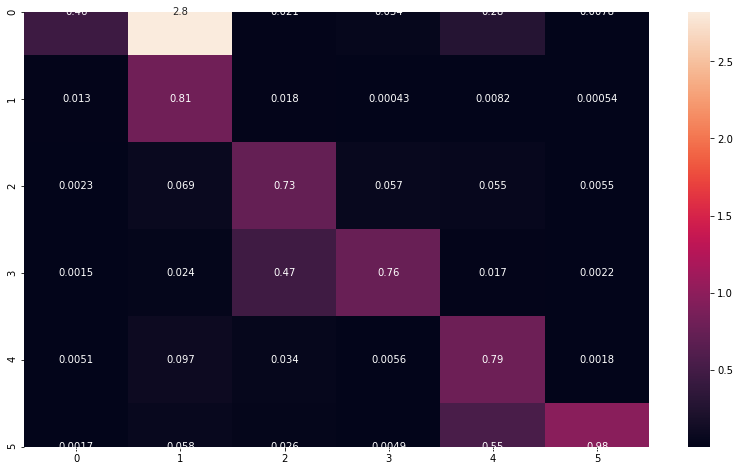

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
plt.figure(figsize=(14,8))
cm = confusion_matrix(np.argmax(features, axis=1), y_test)
cm = cm.astype(np.float) / cm.astype(np.float).sum(axis=1)
sb.heatmap(cm, annot=True)#, fmt='g')